In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import pandas as pd 

df = pd.read_csv('./Merged_data.csv', error_bad_lines=False, sep=';')

Ddf = df.drop(df.columns[[0, 2, 3, 4, 5, 6, 7, 9, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29 ,30 ,31, 32 ,33, 34,
 35, 36, 37, 38, 39, 40 , 41, 42, 43, 44, 45, 46, 47, 48, 49, 50 ,51, 73, 74]], axis=1)

Ddf.dropna(subset = ["crawl_month"], inplace=True)
Ddf.dropna(subset = ["standing_month"], inplace=True)
Ddf.dropna(subset = ["walking_month"], inplace=True)
Ddf.dropna(subset = ["bicycles_training_wheels_month"], inplace=True)
Ddf.dropna(subset = ["bicycles_month"], inplace=True)

data = Ddf.fillna(Ddf.median())

print(data.head())

N = 2
# Drop last N columns of dataframe
data = data.iloc[: , :-N]
data


     Gender  MQ catogory  Lengte (afgerond op 0.1 cm)  \
701     1.0          3.0                        117.0   
705     0.0          5.0                        111.0   
706     1.0          3.0                        110.0   
709     0.0          2.0                        115.0   
714     1.0          3.0                        103.0   

     Gewicht (afgerond op 0.1 kg)    BMI  crawl_month  standing_month  \
701                          27.7  20.24          6.0             8.0   
705                          17.5  14.20         12.0            14.0   
706                          18.8  15.54          6.0            11.0   
709                          22.5  17.01          5.0             8.0   
714                          17.5  16.50         10.0            11.0   

     walking_month  bicycles_training_wheels_month  bicycles_month  ...  \
701           15.0                            28.0            48.0  ...   
705           14.0                            24.0            36.0  

b'Skipping line 955: expected 128 fields, saw 129\nSkipping line 982: expected 128 fields, saw 129\nSkipping line 983: expected 128 fields, saw 129\nSkipping line 1291: expected 128 fields, saw 129\nSkipping line 1361: expected 128 fields, saw 129\nSkipping line 1661: expected 128 fields, saw 129\nSkipping line 1700: expected 128 fields, saw 129\nSkipping line 1710: expected 128 fields, saw 129\n'


,Gender,MQ catogory,Lengte (afgerond op 0.1 cm),Gewicht (afgerond op 0.1 kg),BMI,crawl_month,standing_month,walking_month,bicycles_training_wheels_month,bicycles_month,...,corrigeren_tedruk,binnenhouden_ongeactweer,leren_bewegen_gezondheid,onder_begeleiding_spelen,belonen_wanneer_rustig,buitenspeel_materiaal_beschikbaar,tv_bezighouden,niet_buiten_verkeersveiligheid,niet_buiten_criminaliteit,toestaan_langetijd_schermen
701,1.0,3.0,117.0,27.7,20.24,6.0,8.0,15.0,28.0,48.0,...,1.0,1.0,5.0,3.0,2.0,5.0,2.0,2.0,2.0,2.0
705,0.0,5.0,111.0,17.5,14.20,12.0,14.0,14.0,24.0,36.0,...,3.0,2.0,4.0,3.0,3.0,5.0,3.0,2.0,1.0,3.0
706,1.0,3.0,110.0,18.8,15.54,6.0,11.0,14.0,20.0,48.0,...,3.0,2.0,4.0,4.0,3.0,5.0,3.0,4.0,4.0,2.0
709,0.0,2.0,115.0,22.5,17.01,5.0,8.0,10.5,20.0,55.0,...,3.0,2.0,5.0,4.0,2.0,4.0,3.0,2.0,1.0,2.0
714,1.0,3.0,103.0,17.5,16.50,10.0,11.0,12.0,36.0,48.0,...,1.0,1.0,4.0,3.0,1.0,5.0,2.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,0.0,3.0,111.5,17.8,14.32,6.0,11.0,14.0,48.0,60.0,...,2.0,1.0,5.0,4.0,2.0,5.0,2.0,1.0,1.0,1.0
1691,1.0,4.0,112.0,19.4,15.47,7.0,8.0,10.0,26.0,40.0,...,3.0,1.0,5.0,3.0,3.0,5.0,3.0,3.0,2.0,2.0
1694,0.0,3.0,104.0,15.8,14.61,11.0,10.0,13.0,37.0,45.0,...,3.0,2.0,5.0,1.0,1.0,5.0,3.0,1.0,1.0,2.0
1696,0.0,4.0,125.0,23.6,15.10,10.0,12.0,15.0,36.0,40.0,...,2.0,1.0,5.0,4.0,2.0,4.0,3.0,2.0,1.0,3.0


In [15]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.metrics import  f1_score
scaler = MinMaxScaler()

X = data.drop(data.columns[[8]], axis = 1)
y = data["MQ catogory"].values
#print(X)
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,random_state=42)

lasso = LogisticRegression(C=0.01, penalty='l1', solver='saga')

lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
f1_score(y_test, lasso_pred, average='micro')

0.5121951219512195

In [16]:
lasso.score(X_train, y_train)

0.44036697247706424

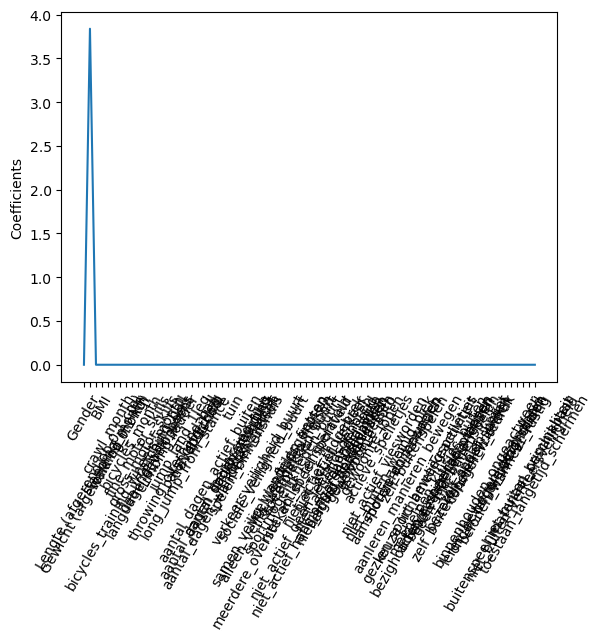

In [14]:
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
names = data.drop('MQ catogory', axis=1).columns
lasso = Lasso(alpha=0.01)
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

In [10]:
%%javascript
Jupyter.notebook.session.delete()

<IPython.core.display.Javascript object>